In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# 데이터 생성 (입력 x와 타깃 y)
# -1부터 1까지 100개의 값을 균등하게 나눈 1차원 텐서를 생성
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # (100, 1)
y = 2 * x + 3 + 0.1 * torch.randn(x.size())  # 노이즈 추가
x.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

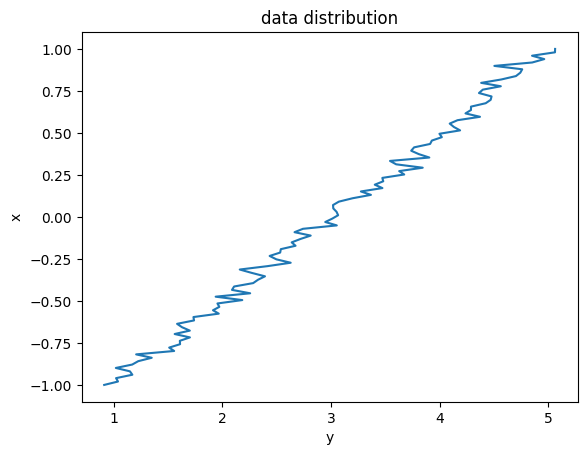

In [13]:
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 2 * x + 3 + 0.1 * torch.randn(x.size()) 
plt.plot(y.numpy(), x.numpy())
plt.title("data distribution")
plt.xlabel("y")  # x축 이름 설정
plt.ylabel("x")  # y축 이름 설정
plt.show()

In [8]:
# 모델 정의 (입력 1차원 → 출력 1차원)
model = nn.Linear(in_features=1, out_features=1)
model

Linear(in_features=1, out_features=1, bias=True)

In [9]:
# 손실 함수 및 옵티마이저
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [10]:
# 학습 루프
for epoch in range(100):
    model.train()
    
    # 순전파
    output = model(x)
    loss = criterion(output, y)
    
    # 역전파 및 최적화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 14.8711
Epoch 10, Loss: 0.6398
Epoch 20, Loss: 0.1281
Epoch 30, Loss: 0.0372
Epoch 40, Loss: 0.0153
Epoch 50, Loss: 0.0100
Epoch 60, Loss: 0.0087
Epoch 70, Loss: 0.0084
Epoch 80, Loss: 0.0083
Epoch 90, Loss: 0.0083


In [11]:
# 학습된 가중치와 편향 확인
print("Weight:", model.weight.item())
print("Bias:", model.bias.item())

Weight: 2.019763708114624
Bias: 2.995833396911621


- nn.Linear(1, 1)은 단순히 𝑦=𝑤𝑥+𝑏 구조입니다.

- 위 예제는 PyTorch의 `nn.Linear`가 실제로 선형 회귀 모델처럼 작동하며 학습 가능한 weight와 bias를 포함하고 있다는 것을 보여줍니다.

- 학습 후 weight ≈ 2, bias ≈ 3에 가까워지면 학습이 잘 된 것입니다.

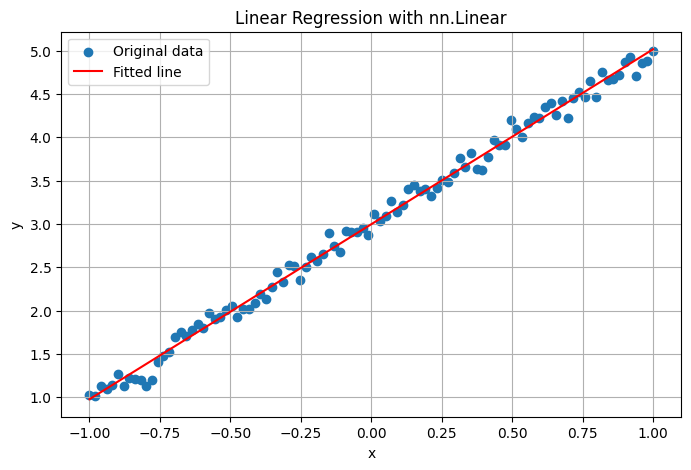

In [12]:
# 6. 예측 결과 시각화
import matplotlib.pyplot as plt

model.eval()
predicted = model(x).detach().numpy()

plt.figure(figsize=(8, 5))
plt.scatter(x.numpy(), y.numpy(), label='Original data')
plt.plot(x.numpy(), predicted, color='red', label='Fitted line')
plt.title("Linear Regression with nn.Linear")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()